Ödev 1: Minst handwritten datasını kullanarak bir adet CNN ağ yapısı geliştiriniz. Ağ yapısı: Conv2D(32,(3,3)) relu activation Conv2D(64,(3,3)) relu activation Maxpooling ((2,2)) Conv2D(128,(3,3)) relu activation Conv2D(64,(3,3)) relu activation Flatten() Dense 256 dropout 0.25 dense 128 dropout 0.3 dense layer for last (Buradaki bilgileri sizden bekliyorum.)

10 epoch olacak şekilde çalıştırmanızı isitiyorum.

daha sonrasında bathc_size 32 64 128 256 512 1024 olacak şekilde deneyiniz. Accuracy değerlerini ve çalışma süreleriniz karşılaştırnız. Bunu plot olarak çizdiriniz.

In [49]:
from keras.datasets import mnist
from keras.utils import np_utils, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.optimizers import SGD
from keras.utils.data_utils import random
from google.colab.patches import cv2_imshow    
from time import time
import numpy as np 
import matplotlib.pyplot as plt

In [50]:
(Xtrain,Ytrain),(Xtest,Ytest) = mnist.load_data()
Xtest.shape

(10000, 28, 28)

In [51]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],28,28,1)
Xtest=Xtest.reshape(Xtest.shape[0],28,28,1)

In [52]:
Xtrain=Xtrain.astype("float32")
Xtest=Xtest.astype("float32")
Xtrain/=255
Xtest/=255
Ytrain=to_categorical(Ytrain)
Ytest=to_categorical(Ytest)

In [53]:
Ytest.shape

(10000, 10)

In [54]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape= Xtrain.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3), activation="relu"))

model.add(Flatten())
model.add(Dense(256)) 
model.add(Dropout(0.25))
model.add(Dense(128))
model.add(Dropout(0.3))

model.add(Dense(Ytrain.shape[1], activation="softmax")) 
model.compile(loss = 'categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

print(model.summary())    

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_15 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 activation_16 (Activation)  (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 128)       73856     
                                                      

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0894 - accuracy: 0.9957 - val_loss: 0.3729 - val_accuracy: 0.9909
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0376 - accuracy: 0.9977 - val_loss: 0.3815 - val_accuracy: 0.9913
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0401 - accuracy: 0.9978 - val_loss: 0.3786 - val_accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0478 - accuracy: 0.9972 - val_loss: 0.3475 - val_accuracy: 0.9905
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0436 - accuracy: 0.9977 - val_loss: 0.3615 - val_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0419 - accuracy: 0.9977 - val_loss: 0.3682 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0498 - accuracy: 0.9974 - val_loss: 0.2843 - val_accuracy

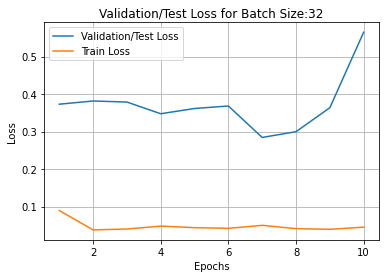

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0213 - accuracy: 0.9987 - val_loss: 0.4346 - val_accuracy: 0.9894
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0109 - accuracy: 0.9990 - val_loss: 0.3855 - val_accuracy: 0.9906
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0186 - accuracy: 0.9988 - val_loss: 0.4292 - val_accuracy: 0.9894
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0372 - accuracy: 0.9984 - val_loss: 0.5142 - val_accuracy: 0.9885
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0203 - accuracy: 0.9989 - val_loss: 0.4092 - val_accuracy: 0.9917
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0282 - accuracy: 0.9987 - val_loss: 0.4349 - val_accuracy: 0.9909
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0243 - accuracy: 0.9988 - val_loss: 0.4477 - val_accuracy: 0.9913
Epoch 

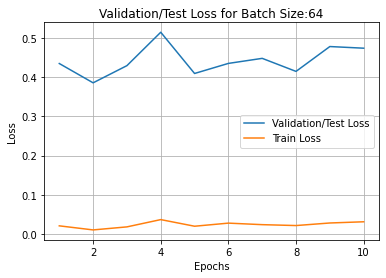

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0159 - accuracy: 0.9993 - val_loss: 0.3445 - val_accuracy: 0.9936
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0035 - accuracy: 0.9998 - val_loss: 0.3789 - val_accuracy: 0.9927
Epoch 3/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.4560 - val_accuracy: 0.9923
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0065 - accuracy: 0.9997 - val_loss: 0.3954 - val_accuracy: 0.9936
Epoch 5/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0102 - accuracy: 0.9994 - val_loss: 0.5569 - val_accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0150 - accuracy: 0.9995 - val_loss: 0.5417 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0218 - accuracy: 0.9991 - val_loss: 0.4967 - val_accuracy: 0.9905

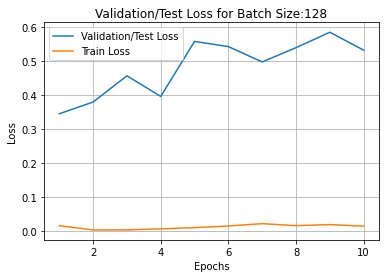

Epoch 1/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0077 - accuracy: 0.9997 - val_loss: 0.5693 - val_accuracy: 0.9925
Epoch 2/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.5153 - val_accuracy: 0.9928
Epoch 3/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 0.6435 - val_accuracy: 0.9923
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.5611 - val_accuracy: 0.9927
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 8.5505e-04 - accuracy: 0.9999 - val_loss: 0.5600 - val_accuracy: 0.9930
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.4919 - val_accuracy: 0.9925
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0022 - accuracy: 0.9998 - val_loss: 0.5216 - val_accuracy: 0.

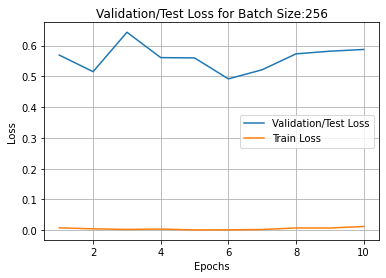

Epoch 1/10
118/118 [==============================] - 4s 32ms/step - loss: 0.0053 - accuracy: 0.9998 - val_loss: 0.5973 - val_accuracy: 0.9929
Epoch 2/10
118/118 [==============================] - 4s 32ms/step - loss: 0.0048 - accuracy: 0.9998 - val_loss: 0.5958 - val_accuracy: 0.9931
Epoch 3/10
118/118 [==============================] - 4s 32ms/step - loss: 4.6491e-04 - accuracy: 0.9999 - val_loss: 0.5756 - val_accuracy: 0.9933
Epoch 4/10
118/118 [==============================] - 4s 33ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.5744 - val_accuracy: 0.9939
Epoch 5/10
118/118 [==============================] - 4s 32ms/step - loss: 8.9495e-04 - accuracy: 1.0000 - val_loss: 0.5775 - val_accuracy: 0.9931
Epoch 6/10
118/118 [==============================] - 4s 32ms/step - loss: 3.0919e-04 - accuracy: 1.0000 - val_loss: 0.6002 - val_accuracy: 0.9930
Epoch 7/10
118/118 [==============================] - 4s 32ms/step - loss: 2.5704e-04 - accuracy: 1.0000 - val_loss: 0.5940 - val_

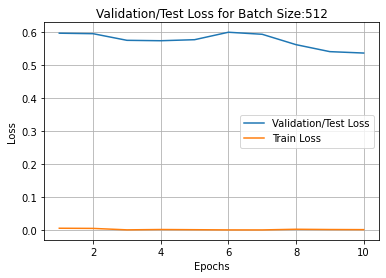

Epoch 1/10
59/59 [==============================] - 4s 64ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.6028 - val_accuracy: 0.9933
Epoch 2/10
59/59 [==============================] - 4s 62ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.5931 - val_accuracy: 0.9931
Epoch 3/10
59/59 [==============================] - 4s 64ms/step - loss: 0.0029 - accuracy: 0.9999 - val_loss: 0.6388 - val_accuracy: 0.9928
Epoch 4/10
59/59 [==============================] - 4s 62ms/step - loss: 3.1441e-04 - accuracy: 0.9999 - val_loss: 0.5537 - val_accuracy: 0.9938
Epoch 5/10
59/59 [==============================] - 4s 62ms/step - loss: 1.2132e-04 - accuracy: 0.9999 - val_loss: 0.5437 - val_accuracy: 0.9937
Epoch 6/10
59/59 [==============================] - 4s 62ms/step - loss: 4.3250e-04 - accuracy: 1.0000 - val_loss: 0.5399 - val_accuracy: 0.9942
Epoch 7/10
59/59 [==============================] - 4s 64ms/step - loss: 6.0141e-04 - accuracy: 1.0000 - val_loss: 0.5247 - val_accuracy: 0.99

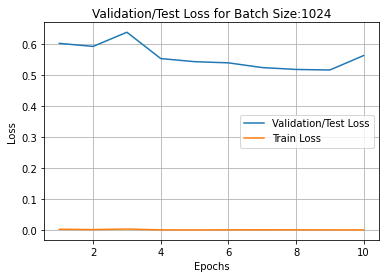

In [60]:
history = [1,2,3,4,5,6]
batch_size = [32,64,128,256,512,1024]

for i in range(6):
    start = time()
    history[i] = model.fit(Xtrain, Ytrain, batch_size=batch_size[i],epochs=10,validation_data=(Xtest, Ytest))
    score = model.evaluate(Xtest, Ytest)

    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print(f'Time for Batch Size {batch_size[i]}=> {time() - start}')
    history_dict = history[i].history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1,len(val_loss_values)+1)
    line1 = plt.plot(epochs,val_loss_values,label="Validation/Test Loss")
    line2 = plt.plot(epochs,loss_values,label="Train Loss")
    plt.title("Validation/Test Loss for Batch Size:{}".format(batch_size[i]))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()
    plt.show()
     